## EDA on Walmart Sales data

### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
data = pd.read_csv('./walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Sorting data by Date

In [4]:
data.sort_values(by='Date',inplace=True)
data.reset_index(drop=True,inplace=True)
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         5 2010-01-10     283178.12             0        71.10       2.603   
1        15 2010-01-10     566945.95             0        59.69       2.840   
2        42 2010-01-10     481523.93             0        86.01       3.001   
3        33 2010-01-10     224294.39             0        91.45       3.001   
4        36 2010-01-10     422169.47             0        74.66       2.567   
...     ...        ...           ...           ...          ...         ...   
6430     41 2012-12-10    1409544.97             0        39.38       3.760   
6431     16 2012-12-10     491817.19             0        43.26       3.760   
6432     10 2012-12-10    1713889.11             0        76.03       4.468   
6433     25 2012-12-10     697317.41             0        43.74       4.000   
6434      2 2012-12-10    1900745.13             0        60.97       3.601   

             CPI  Unemployment  
0     212.226946         6.768  
1     132.756800         8.067  
2     126.234600         9.003  
3     126.234600         9.265  
4     210.440443         8.476  
...          ...           ...  
6430  199.053937         6.195  
6431  199.053937         5.847  
6432  131.108333         6.943  
6433  216.115057         7.293  
6434  223.015426         6.170  

[6435 rows x 8 columns]

In [5]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

### Univariate Analysis

### Hist plot

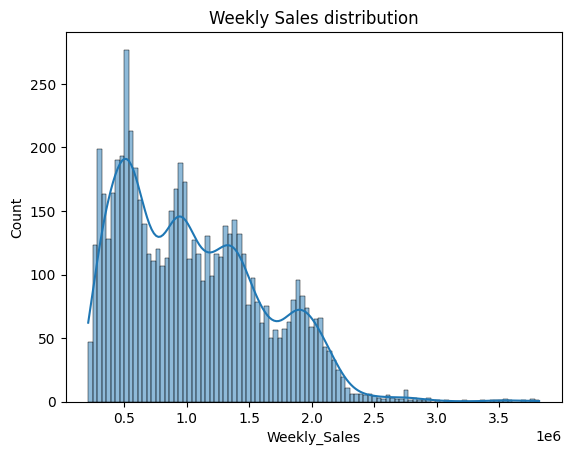

In [8]:
sns.histplot(data=data,kde=True,x='Weekly_Sales',bins=100)
plt.title("Weekly Sales distribution")
plt.show()

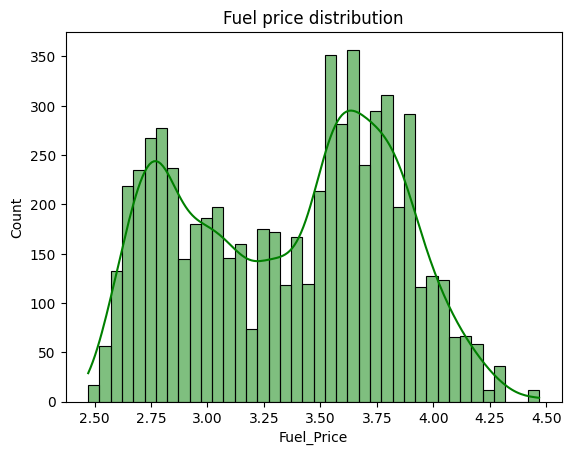

In [9]:
sns.histplot(data=data,kde=True,x='Fuel_Price',bins=40,color='g')
plt.title("Fuel price distribution")
plt.show()

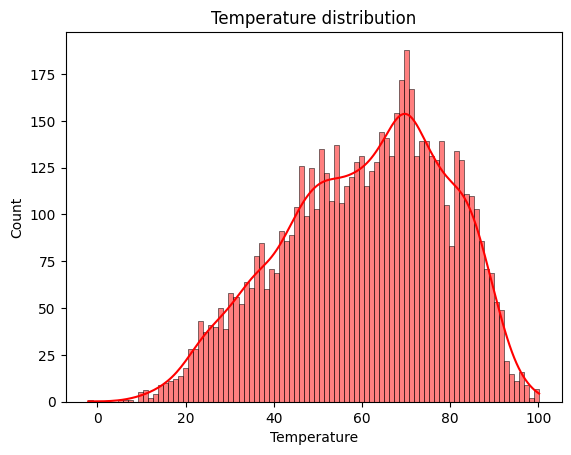

In [10]:
sns.histplot(data=data,kde=True,x='Temperature',bins=90,color='r')
plt.title("Temperature distribution")
plt.show()

#### Temperature shows Normal distribution

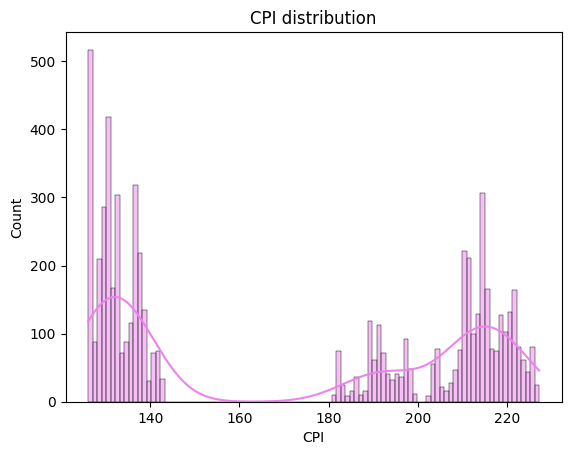

In [11]:
sns.histplot(data=data,kde=True,x='CPI',bins=100,color='violet')
plt.title("CPI distribution")
plt.show()

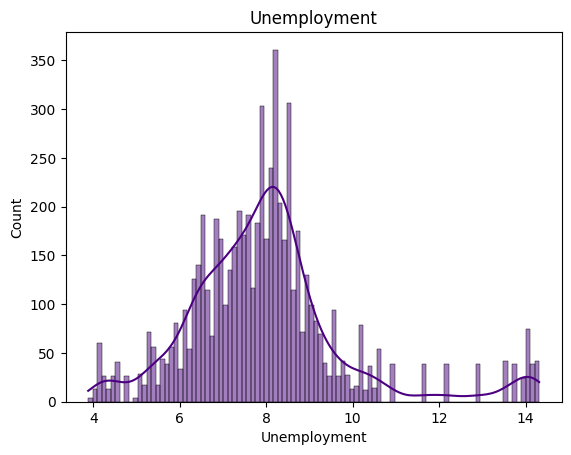

In [12]:
sns.histplot(data=data,kde=True,x='Unemployment',bins=100,color='indigo')
plt.title("Unemployment")
plt.show()

#### Shows Normal distribution

In [13]:
column_grping = ['Weekly_Sales','Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']

### Boxplot

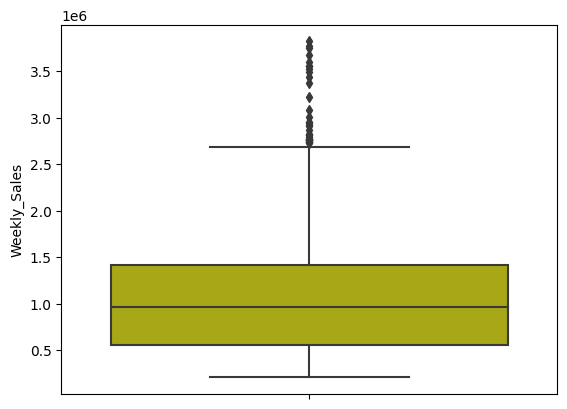

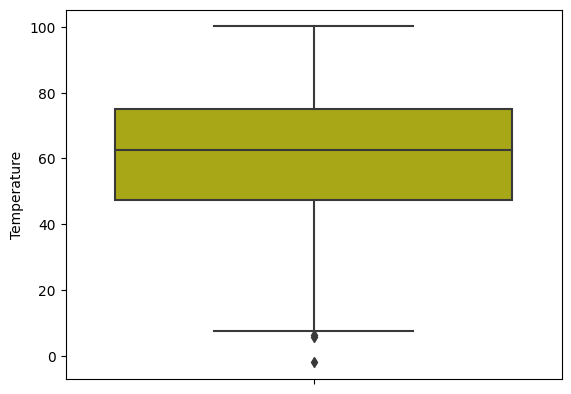

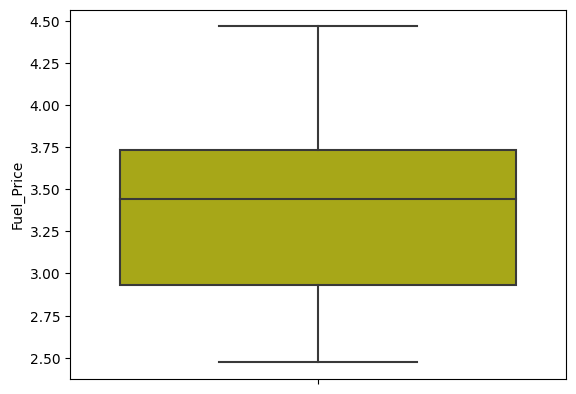

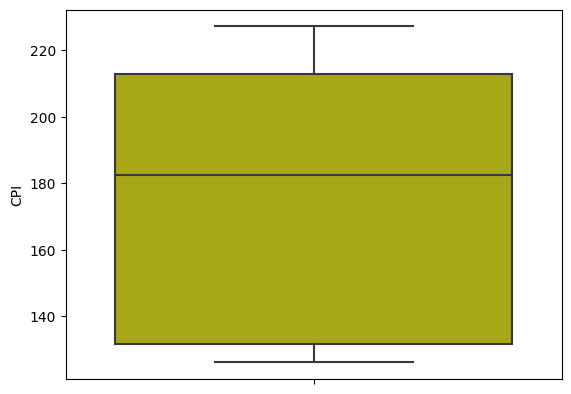

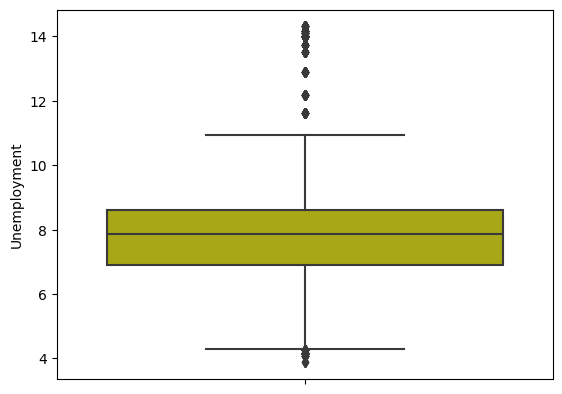

In [14]:
for i in column_grping:
    sns.boxplot(y=data[i],data=data,color='y')
    plt.show()

### Histplot

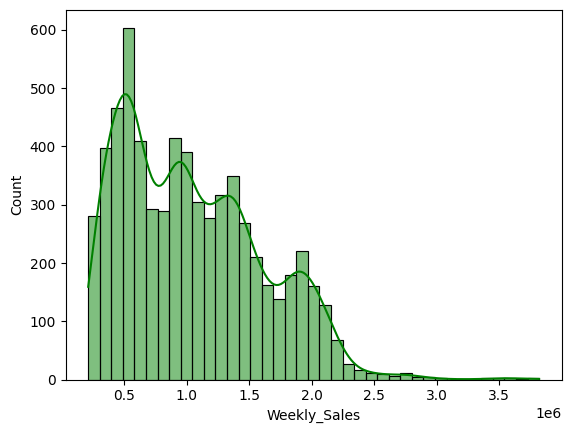

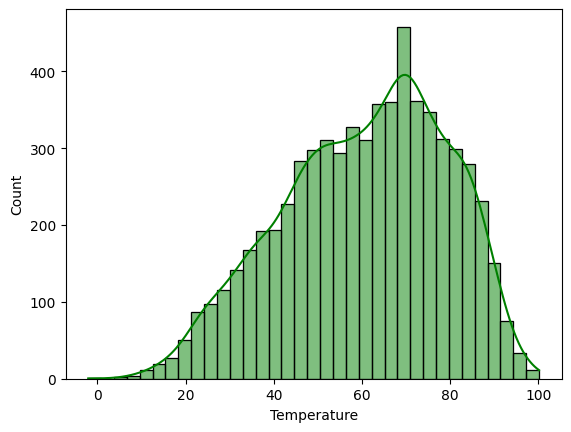

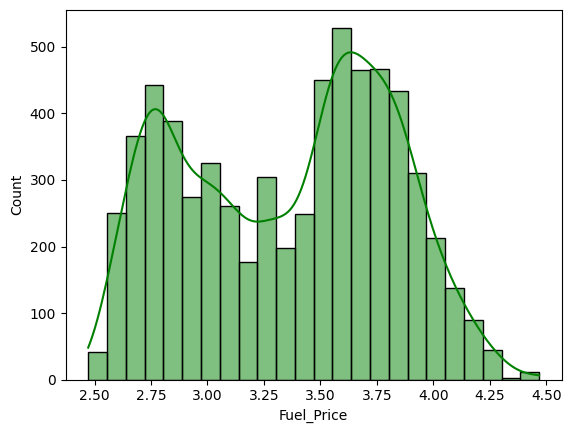

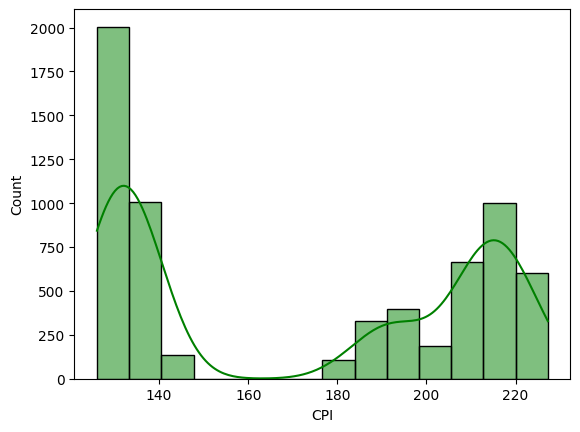

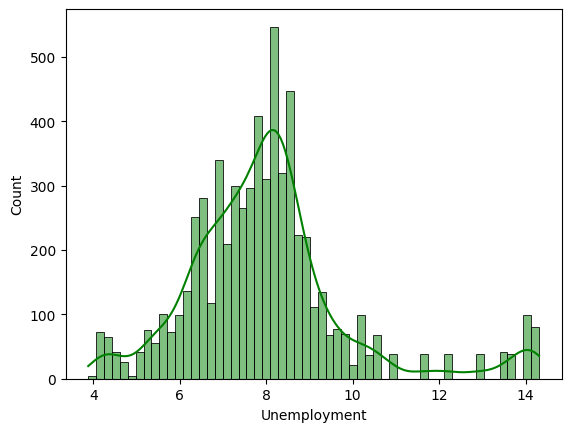

In [15]:
for i in column_grping:
    sns.histplot(kde=True,data=data,x=data[i],color='green')
    plt.show()

In [16]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

### Countplot

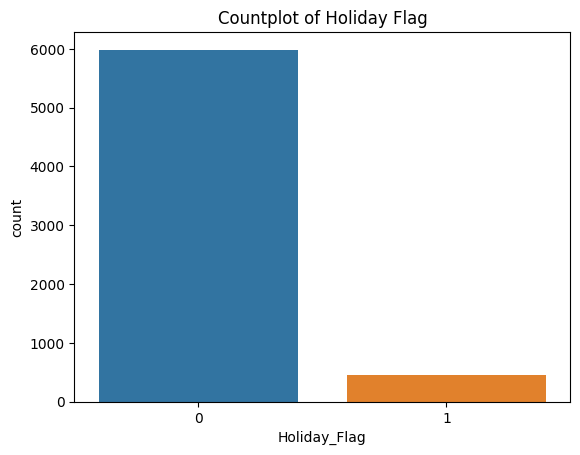

In [17]:
sns.countplot(data=data,x='Holiday_Flag')
plt.title("Countplot of Holiday Flag")
plt.show()

### Line charts

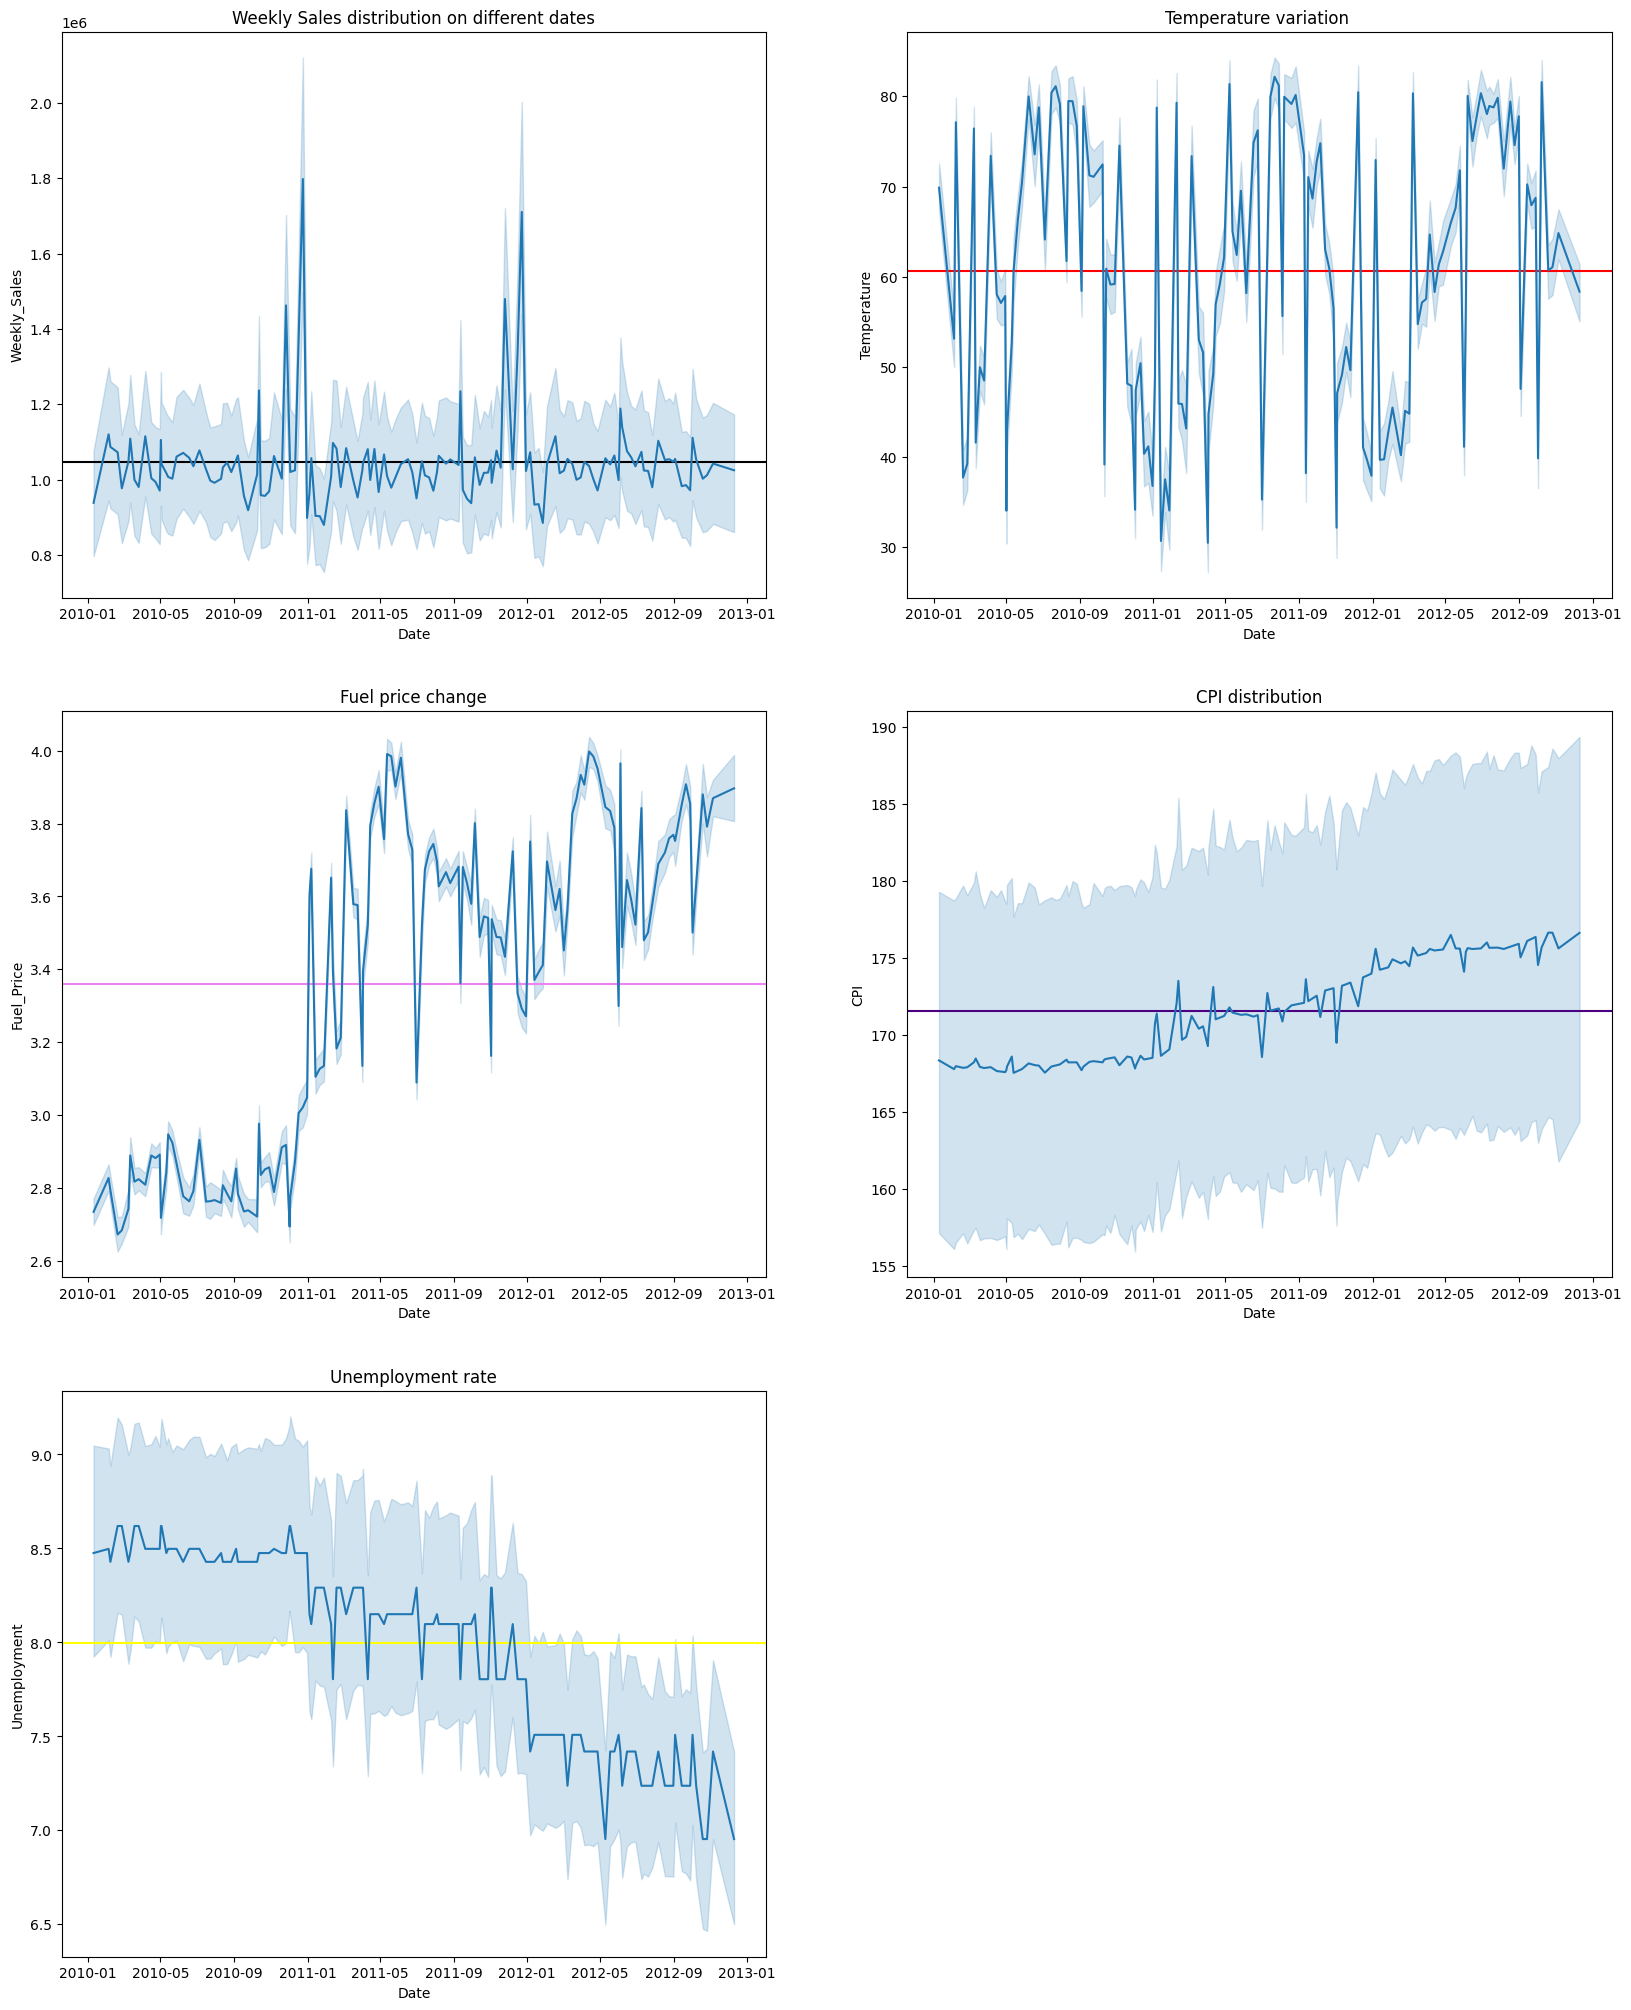

In [18]:
plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
plt.axhline(y=data.Weekly_Sales.mean(),color='black')
plt.title("Weekly Sales distribution on different dates")
sns.lineplot(x='Date',y='Weekly_Sales',data=data)



plt.subplot(3,2,2)
plt.axhline(y=data.Temperature.mean(),color='r')
plt.title("Temperature variation ")
sns.lineplot(x='Date',y='Temperature',data=data)



plt.subplot(3,2,3)
plt.axhline(y=data.Fuel_Price.mean(),color='violet')
plt.title("Fuel price change")
sns.lineplot(x='Date',y='Fuel_Price',data=data)



plt.subplot(3,2,4)
plt.axhline(y=data.CPI.mean(),color='indigo')
plt.title("CPI distribution")
sns.lineplot(x='Date',y='CPI',data=data)



plt.subplot(3,2,5)
plt.axhline(y=data.Unemployment.mean(),color='yellow')
plt.title("Unemployment rate")
sns.lineplot(x='Date',y='Unemployment',data=data)
plt.show()

#### Fuel price and CPI increases and Unemployment rate decreases over the years

### Scatter plots

### Temperature effect 

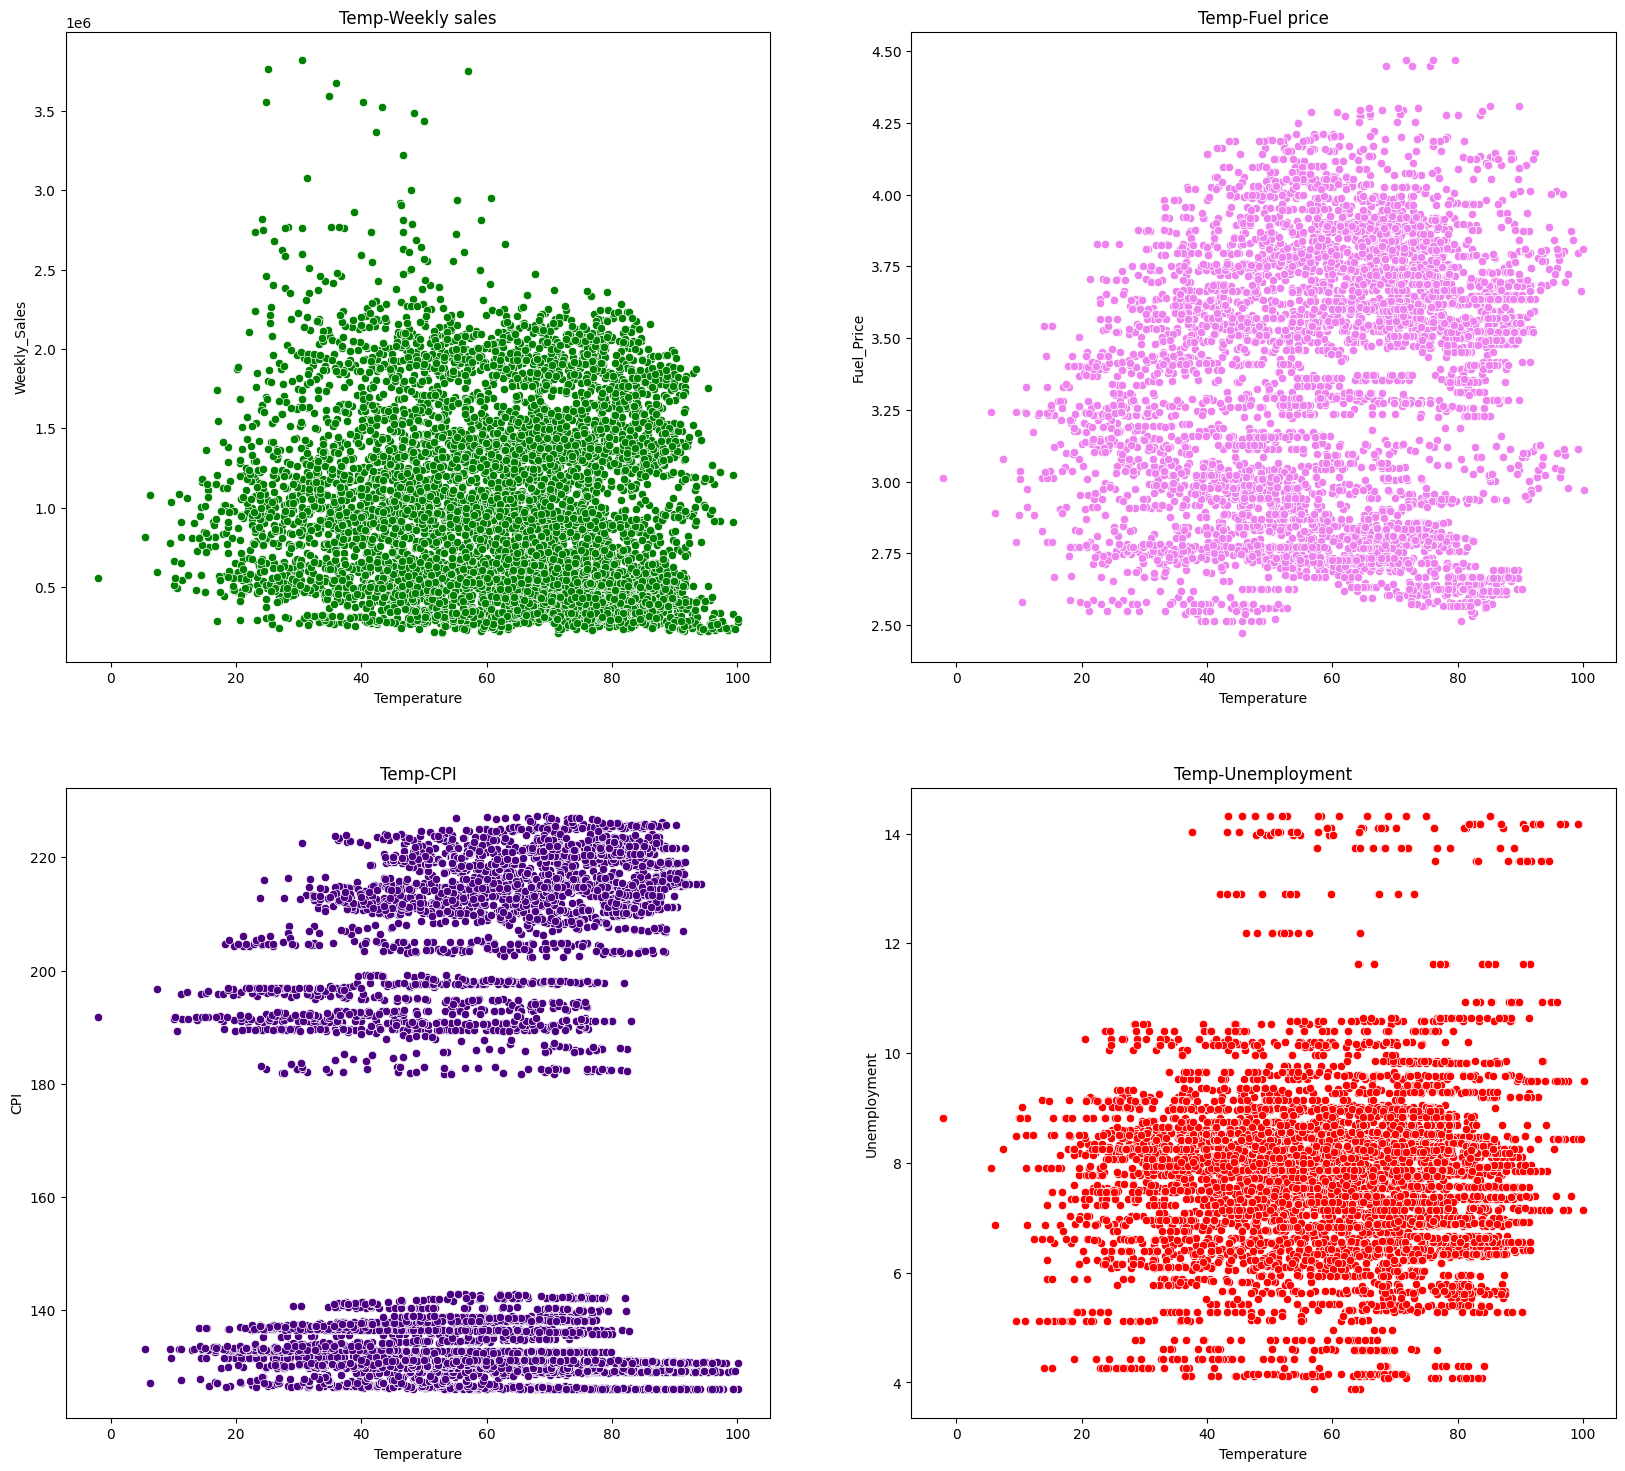

In [19]:
plt.figure(figsize=(20,18))
plt.subplot(2,2,1)
plt.title("Temp-Weekly sales")
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=data,color='g')

plt.subplot(2,2,2)
plt.title("Temp-Fuel price")
sns.scatterplot(x='Temperature',y='Fuel_Price',data=data,color='violet')

plt.subplot(2,2,3)
plt.title("Temp-CPI")
sns.scatterplot(data=data,x='Temperature',y='CPI',color='indigo')

plt.subplot(2,2,4)
plt.title("Temp-Unemployment")
sns.scatterplot(data=data,x='Temperature',y='Unemployment',color='r')
plt.show()

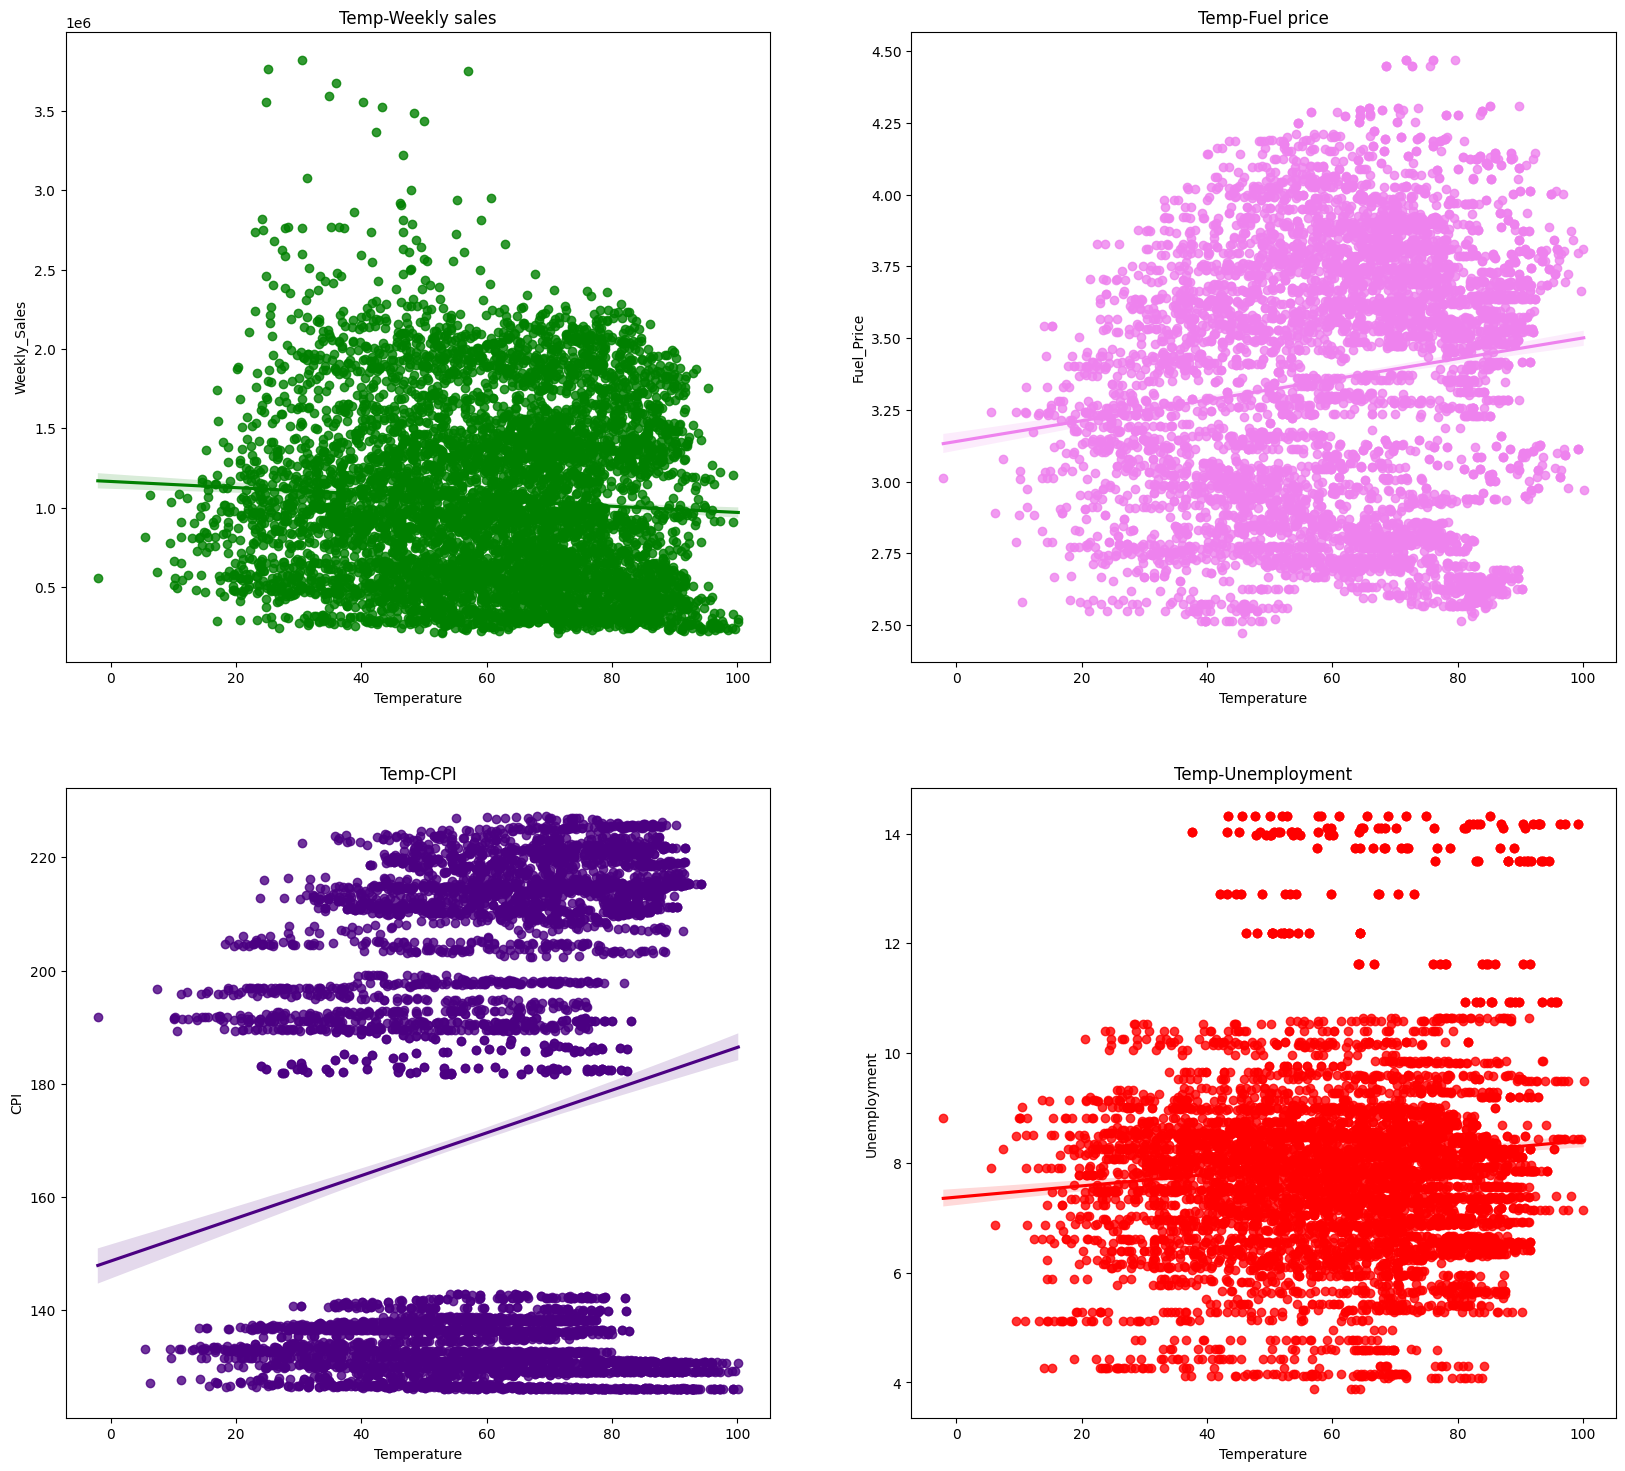

In [20]:
plt.figure(figsize=(20,18))
plt.subplot(2,2,1)
plt.title("Temp-Weekly sales")
sns.regplot(x='Temperature',y='Weekly_Sales',data=data,color='g')

plt.subplot(2,2,2)
plt.title("Temp-Fuel price")
sns.regplot(x='Temperature',y='Fuel_Price',data=data,color='violet')

plt.subplot(2,2,3)
plt.title("Temp-CPI")
sns.regplot(data=data,x='Temperature',y='CPI',color='indigo')

plt.subplot(2,2,4)
plt.title("Temp-Unemployment")
sns.regplot(data=data,x='Temperature',y='Unemployment',color='r')
plt.show()

#### Temp with CPI  are having a positive correlation and temp with Fuel price are  having a slight negative coorelation

### Regplot

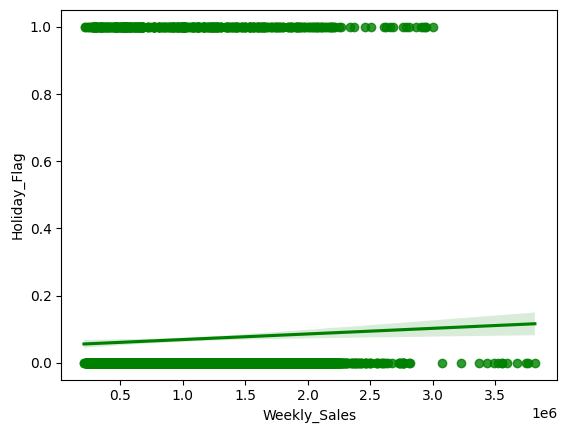

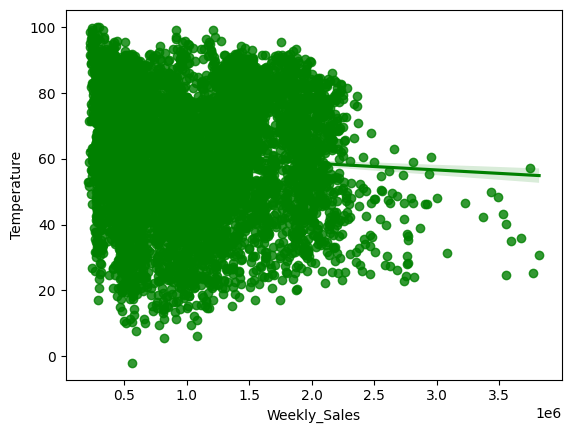

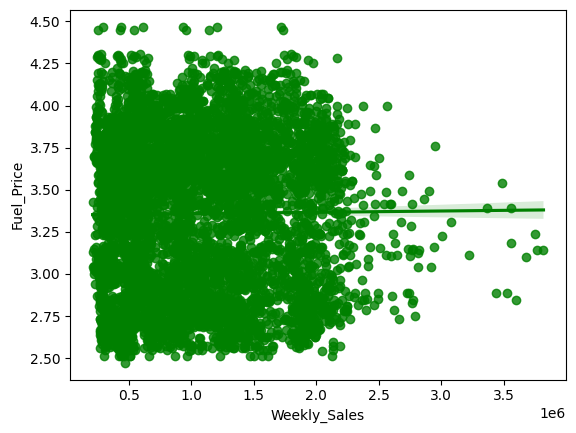

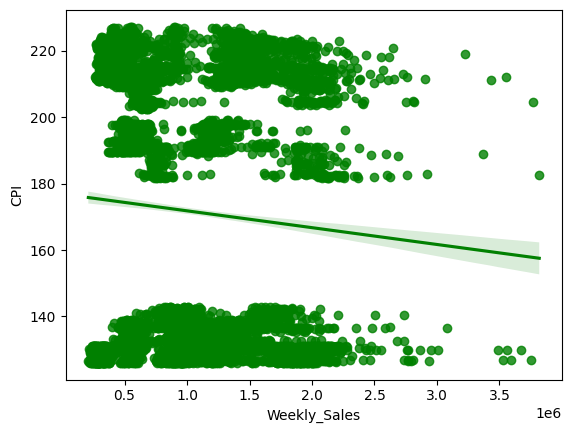

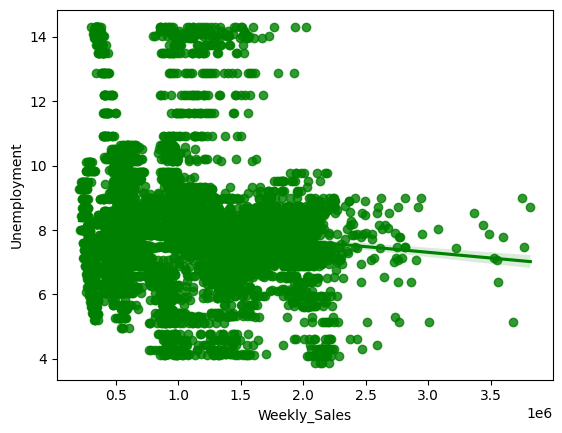

In [21]:
reg_list = ['Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']
for i in reg_list:
    sns.regplot(x='Weekly_Sales',y=data[i],data=data,color='green')
    plt.show()

#### Weekly sales and CPI having a negative correlation

### Regplot

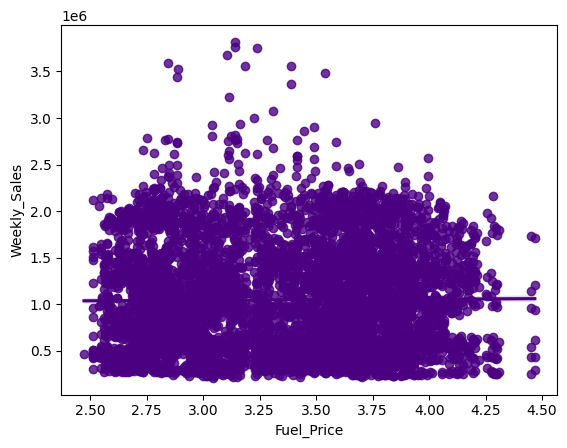

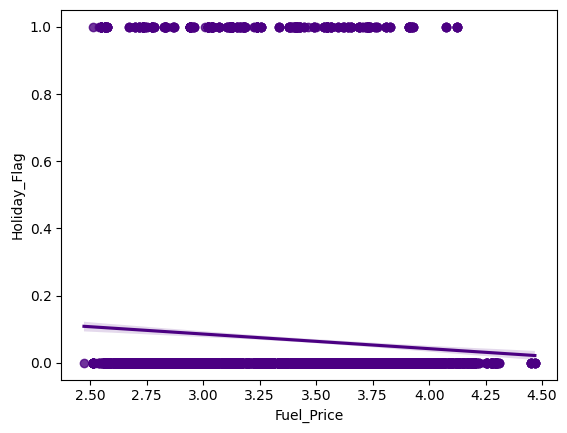

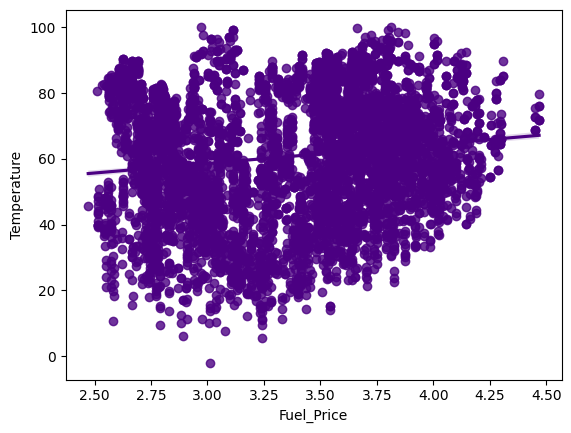

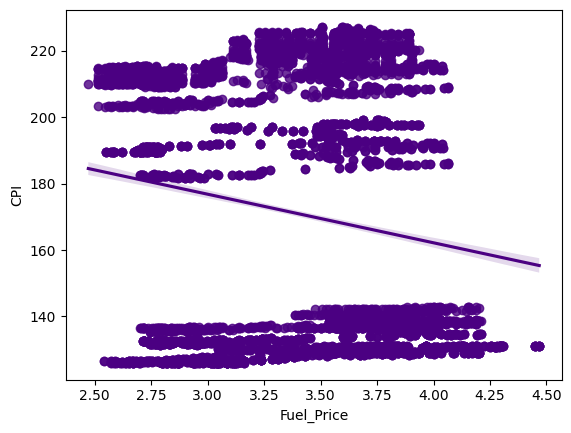

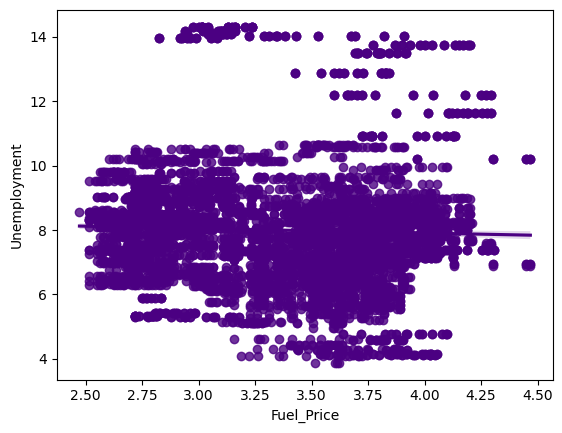

In [22]:
reg_list = ['Weekly_Sales','Holiday_Flag', 'Temperature',
       'CPI', 'Unemployment']
for i in reg_list:
    sns.regplot(x='Fuel_Price',y=data[i],data=data,color='indigo')
    plt.show()

#### Fuel price and CPI have a negative correlation

### adding new columns

In [23]:
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Weekday'] = data.Date.dt.weekday
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         5 2010-01-10     283178.12             0        71.10       2.603   
1        15 2010-01-10     566945.95             0        59.69       2.840   
2        42 2010-01-10     481523.93             0        86.01       3.001   
3        33 2010-01-10     224294.39             0        91.45       3.001   
4        36 2010-01-10     422169.47             0        74.66       2.567   
...     ...        ...           ...           ...          ...         ...   
6430     41 2012-12-10    1409544.97             0        39.38       3.760   
6431     16 2012-12-10     491817.19             0        43.26       3.760   
6432     10 2012-12-10    1713889.11             0        76.03       4.468   
6433     25 2012-12-10     697317.41             0        43.74       4.000   
6434      2 2012-12-10    1900745.13             0        60.97       3.601   

             CPI  Unemployment  Year  Month  Weekday  
0     212.226946         6.768  2010      1        6  
1     132.756800         8.067  2010      1        6  
2     126.234600         9.003  2010      1        6  
3     126.234600         9.265  2010      1        6  
4     210.440443         8.476  2010      1        6  
...          ...           ...   ...    ...      ...  
6430  199.053937         6.195  2012     12        0  
6431  199.053937         5.847  2012     12        0  
6432  131.108333         6.943  2012     12        0  
6433  216.115057         7.293  2012     12        0  
6434  223.015426         6.170  2012     12        0  

[6435 rows x 11 columns]

### Changing num values to corresponding months and days

In [24]:
data['Month_Names'] = data.Month.replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',
                                   11:'Nov',12:'Dec'})
data['Weekday_Names'] = data.Weekday.replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'})

In [25]:
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         5 2010-01-10     283178.12             0        71.10       2.603   
1        15 2010-01-10     566945.95             0        59.69       2.840   
2        42 2010-01-10     481523.93             0        86.01       3.001   
3        33 2010-01-10     224294.39             0        91.45       3.001   
4        36 2010-01-10     422169.47             0        74.66       2.567   
...     ...        ...           ...           ...          ...         ...   
6430     41 2012-12-10    1409544.97             0        39.38       3.760   
6431     16 2012-12-10     491817.19             0        43.26       3.760   
6432     10 2012-12-10    1713889.11             0        76.03       4.468   
6433     25 2012-12-10     697317.41             0        43.74       4.000   
6434      2 2012-12-10    1900745.13             0        60.97       3.601   

             CPI  Unemployment  Year  Month  Weekday Month_Names Weekday_Names  
0     212.226946         6.768  2010      1        6         Jan           Sat  
1     132.756800         8.067  2010      1        6         Jan           Sat  
2     126.234600         9.003  2010      1        6         Jan           Sat  
3     126.234600         9.265  2010      1        6         Jan           Sat  
4     210.440443         8.476  2010      1        6         Jan           Sat  
...          ...           ...   ...    ...      ...         ...           ...  
6430  199.053937         6.195  2012     12        0         Dec           Sun  
6431  199.053937         5.847  2012     12        0         Dec           Sun  
6432  131.108333         6.943  2012     12        0         Dec           Sun  
6433  216.115057         7.293  2012     12        0         Dec           Sun  
6434  223.015426         6.170  2012     12        0         Dec           Sun  

[6435 rows x 13 columns]

### Droping Date column

In [26]:
data.drop(columns=['Date'],inplace=True)
data

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         5     283178.12             0        71.10       2.603  212.226946   
1        15     566945.95             0        59.69       2.840  132.756800   
2        42     481523.93             0        86.01       3.001  126.234600   
3        33     224294.39             0        91.45       3.001  126.234600   
4        36     422169.47             0        74.66       2.567  210.440443   
...     ...           ...           ...          ...         ...         ...   
6430     41    1409544.97             0        39.38       3.760  199.053937   
6431     16     491817.19             0        43.26       3.760  199.053937   
6432     10    1713889.11             0        76.03       4.468  131.108333   
6433     25     697317.41             0        43.74       4.000  216.115057   
6434      2    1900745.13             0        60.97       3.601  223.015426   

      Unemployment  Year  Month  Weekday Month_Names Weekday_Names  
0            6.768  2010      1        6         Jan           Sat  
1            8.067  2010      1        6         Jan           Sat  
2            9.003  2010      1        6         Jan           Sat  
3            9.265  2010      1        6         Jan           Sat  
4            8.476  2010      1        6         Jan           Sat  
...            ...   ...    ...      ...         ...           ...  
6430         6.195  2012     12        0         Dec           Sun  
6431         5.847  2012     12        0         Dec           Sun  
6432         6.943  2012     12        0         Dec           Sun  
6433         7.293  2012     12        0         Dec           Sun  
6434         6.170  2012     12        0         Dec           Sun  

[6435 rows x 12 columns]

### Pie plot of Holiday and weekly sales

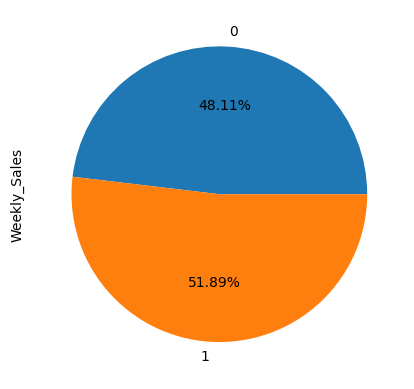

In [27]:
data.groupby(['Holiday_Flag'])['Weekly_Sales'].mean().plot.pie(autopct='%1.2f%%');

### Weekly sales have slight increase on holidays

### Weekly sales and Year Pie chart

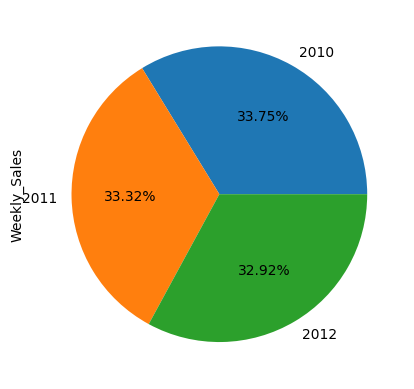

In [28]:
data.groupby(["Year"])['Weekly_Sales'].mean().plot.pie(autopct='%1.2f%%');

### Sales decreases

### Sales on weekdays

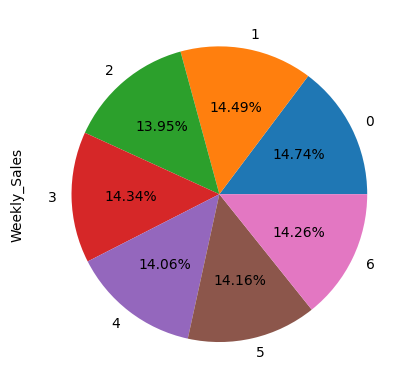

In [29]:
data.groupby(['Weekday'])['Weekly_Sales'].mean().plot.pie(autopct='%1.2f%%');

### Fuel price change

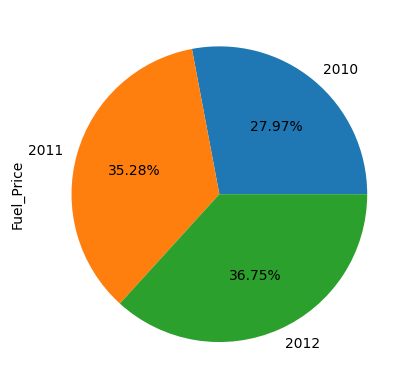

In [30]:
data.groupby(['Year'])['Fuel_Price'].mean().plot.pie(autopct='%1.2f%%');

#### Fuel price increases over the years

### January-2011 data

In [31]:
Jan_2011=data.query("Month_Names== 'Jan' & Weekday_Names=='Mon'").drop(columns=['Holiday_Flag','Year','Month','Weekday','Month_Names'])
Jan_2011

Store  Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  \
2160     16     459756.11        35.75       3.461  192.269171         6.339   
2161      3     374556.08        68.76       3.524  218.211418         7.574   
2162     30     437926.79        56.36       3.524  214.488691         7.931   
2163     19    1305950.22        30.68       3.811  134.068258         7.658   
2164     18     938083.17        35.06       3.638  134.068258         8.975   
2165     41    1179125.48        38.16       3.461  192.269171         6.934   
2166      5     314316.55        61.50       3.524  215.402441         6.489   
2167     34     884233.67        55.46       3.521  128.719935        10.581   
2168     12    1005463.49        63.63       3.772  128.719935        13.736   
2169     39    1316849.36        66.57       3.524  213.577670         8.300   
2170     35     762620.94        37.27       3.638  137.955893         8.512   
2171     45     712425.76        37.27       3.638  185.179017         8.521   
2172     11    1258674.12        69.10       3.524  218.211418         7.574   
2173      4    1900246.47        56.99       3.521  128.719935         5.946   
2174      8     878762.30        49.86       3.524  218.258628         6.297   
2175     22     951588.37        36.04       3.638  137.955893         8.252   
2176     24    1163803.30        35.73       3.811  134.068258         8.212   
2177     38     382098.13        63.63       3.772  128.719935        13.736   
2178      1    1495064.75        59.17       3.524  214.837166         7.682   
2179     36     385672.11        67.31       3.529  213.577670         8.300   
2180     10    1827733.18        67.64       3.772  128.719935         8.494   
2181     37     534578.78        67.31       3.524  213.577670         8.300   
2182      9     520962.14        56.12       3.524  218.445164         6.380   
2183     28    1336838.41        63.63       3.772  128.719935        13.736   
2184     23    1182694.95        29.44       3.638  134.068258         4.781   
2185     25     618377.79        28.50       3.638  207.882304         7.287   
2186      7     513409.67        24.83       3.461  192.269171         8.595   
2187     29     475615.26        36.04       3.638  134.068258         9.966   
2188     40     841889.08        28.60       3.638  134.068258         4.781   
2189     26     849231.61        22.99       3.638  134.068258         7.818   
2190     14    1869110.55        37.27       3.638  185.179017         8.521   
2191      6    1459276.77        62.25       3.524  216.384125         6.855   
2192     44     281514.26        42.49       3.487  128.719935         6.906   
2193     15     542556.05        30.34       3.811  134.068258         7.658   
2194     42     508432.17        67.64       3.772  128.719935         8.494   
2195      2    1800171.36        55.43       3.524  214.488691         7.931   
2196     33     232769.09        71.41       3.772  128.719935         8.687   
2197     32    1051121.02        44.83       3.461  192.269171         8.595   
2198     31    1344890.73        56.36       3.524  214.488691         7.931   
2199     13    1864238.64        42.49       3.487  128.719935         7.193   
2200     43     611585.54        67.79       3.524  206.673311        10.581   
2201     17     795859.23        39.38       3.487  128.719935         6.774   
2202     27    1628868.28        37.27       3.811  137.955893         7.725   
2203     21     732056.37        56.36       3.524  214.488691         7.931   
2204     20    1927993.09        32.43       3.638  207.882304         7.287   

     Weekday_Names  
2160           Mon  
2161           Mon  
2162           Mon  
2163           Mon  
2164           Mon  
2165           Mon  
2166           Mon  
2167           Mon  
2168           Mon  
2169           Mon  
2170           Mon  
2171           Mon  
2172           Mon  
2173           Mon  
2174      

In [32]:
Jan_2011.sort_values(by='Weekly_Sales')

Store  Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  \
2196     33     232769.09        71.41       3.772  128.719935         8.687   
2192     44     281514.26        42.49       3.487  128.719935         6.906   
2166      5     314316.55        61.50       3.524  215.402441         6.489   
2161      3     374556.08        68.76       3.524  218.211418         7.574   
2177     38     382098.13        63.63       3.772  128.719935        13.736   
2179     36     385672.11        67.31       3.529  213.577670         8.300   
2162     30     437926.79        56.36       3.524  214.488691         7.931   
2160     16     459756.11        35.75       3.461  192.269171         6.339   
2187     29     475615.26        36.04       3.638  134.068258         9.966   
2194     42     508432.17        67.64       3.772  128.719935         8.494   
2186      7     513409.67        24.83       3.461  192.269171         8.595   
2182      9     520962.14        56.12       3.524  218.445164         6.380   
2181     37     534578.78        67.31       3.524  213.577670         8.300   
2193     15     542556.05        30.34       3.811  134.068258         7.658   
2200     43     611585.54        67.79       3.524  206.673311        10.581   
2185     25     618377.79        28.50       3.638  207.882304         7.287   
2171     45     712425.76        37.27       3.638  185.179017         8.521   
2203     21     732056.37        56.36       3.524  214.488691         7.931   
2170     35     762620.94        37.27       3.638  137.955893         8.512   
2201     17     795859.23        39.38       3.487  128.719935         6.774   
2188     40     841889.08        28.60       3.638  134.068258         4.781   
2189     26     849231.61        22.99       3.638  134.068258         7.818   
2174      8     878762.30        49.86       3.524  218.258628         6.297   
2167     34     884233.67        55.46       3.521  128.719935        10.581   
2164     18     938083.17        35.06       3.638  134.068258         8.975   
2175     22     951588.37        36.04       3.638  137.955893         8.252   
2168     12    1005463.49        63.63       3.772  128.719935        13.736   
2197     32    1051121.02        44.83       3.461  192.269171         8.595   
2176     24    1163803.30        35.73       3.811  134.068258         8.212   
2165     41    1179125.48        38.16       3.461  192.269171         6.934   
2184     23    1182694.95        29.44       3.638  134.068258         4.781   
2172     11    1258674.12        69.10       3.524  218.211418         7.574   
2163     19    1305950.22        30.68       3.811  134.068258         7.658   
2169     39    1316849.36        66.57       3.524  213.577670         8.300   
2183     28    1336838.41        63.63       3.772  128.719935        13.736   
2198     31    1344890.73        56.36       3.524  214.488691         7.931   
2191      6    1459276.77        62.25       3.524  216.384125         6.855   
2178      1    1495064.75        59.17       3.524  214.837166         7.682   
2202     27    1628868.28        37.27       3.811  137.955893         7.725   
2195      2    1800171.36        55.43       3.524  214.488691         7.931   
2180     10    1827733.18        67.64       3.772  128.719935         8.494   
2199     13    1864238.64        42.49       3.487  128.719935         7.193   
2190     14    1869110.55        37.27       3.638  185.179017         8.521   
2173      4    1900246.47        56.99       3.521  128.719935         5.946   
2204     20    1927993.09        32.43       3.638  207.882304         7.287   

     Weekday_Names  
2196           Mon  
2192           Mon  
2166           Mon  
2161           Mon  
2177           Mon  
2179           Mon  
2162           Mon  
2160           Mon  
2187           Mon  
2194           Mon  
2186           Mon  
2182           Mon  
2181           Mon  
2193           Mon  
2200      

### 2011,Jan Sales-countplot

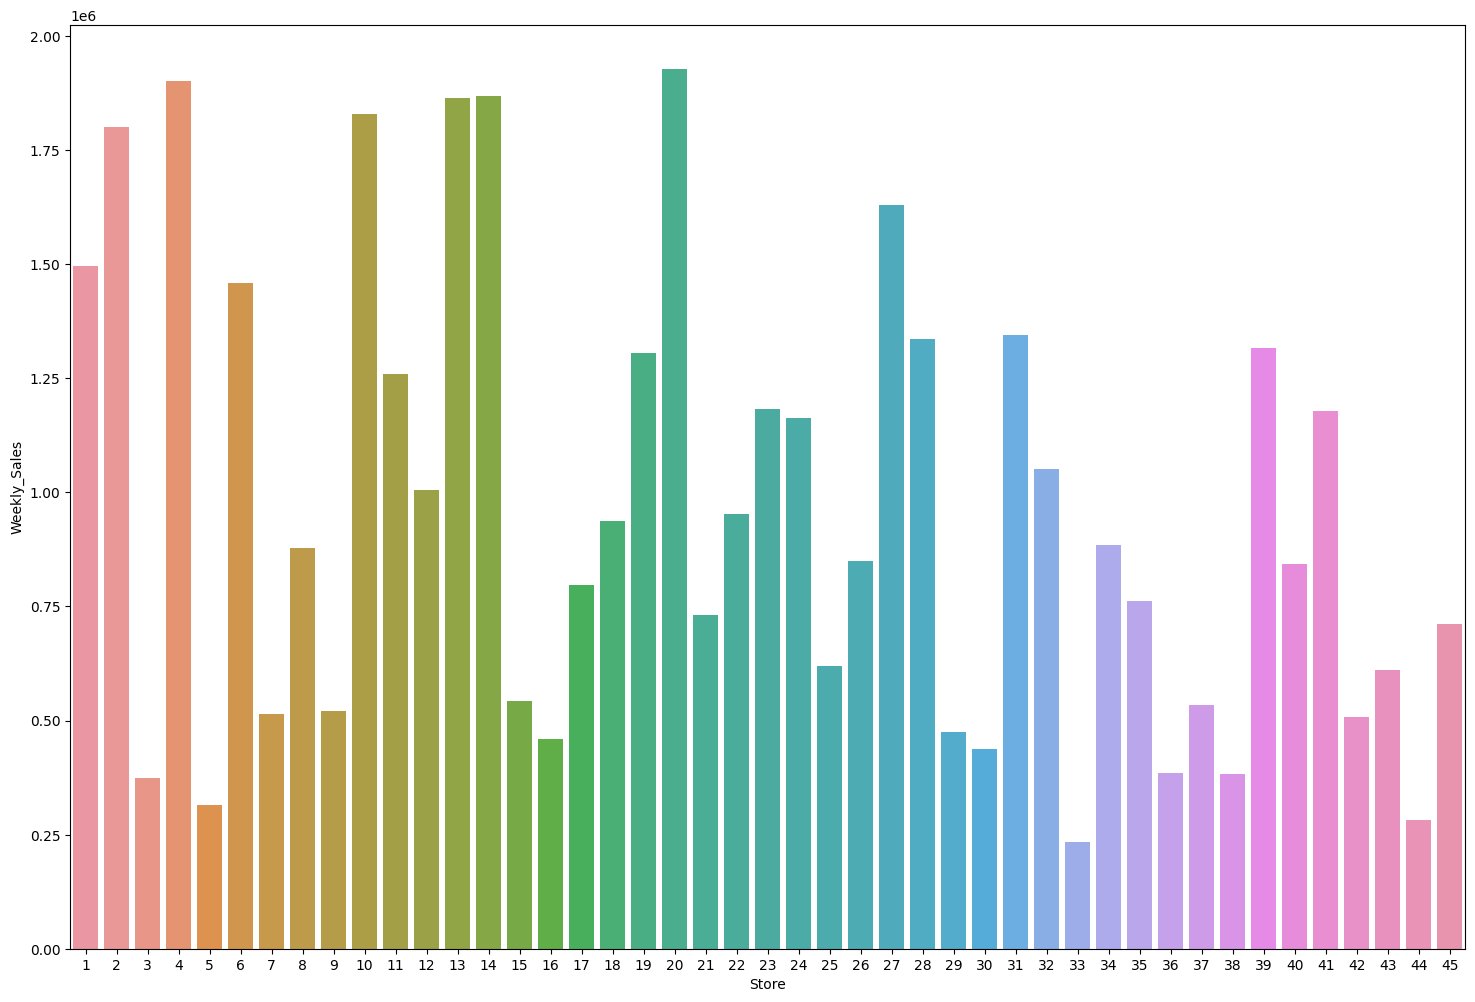

In [33]:
plt.figure(figsize=(18,12))
sns.barplot(data=Jan_2011.sort_values(by='Weekly_Sales'),x='Store',y='Weekly_Sales')
plt.show()

#### Most of the stores have below average sales on jan,2011

### Weekly sales and Temp

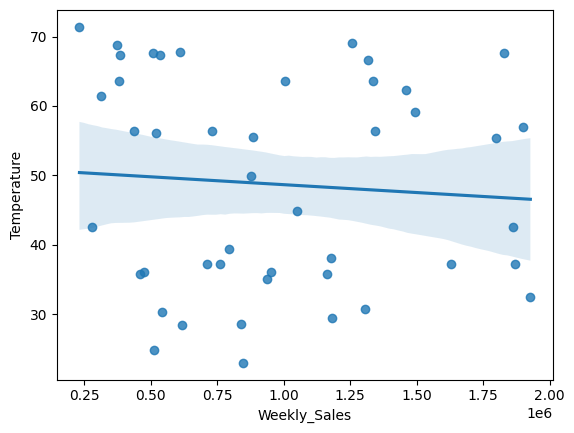

In [34]:
sns.regplot(data=Jan_2011,x='Weekly_Sales',y='Temperature');

#### Slight negativecorrelation between weekly sales and Temp

### Weekly sales and Fuel price

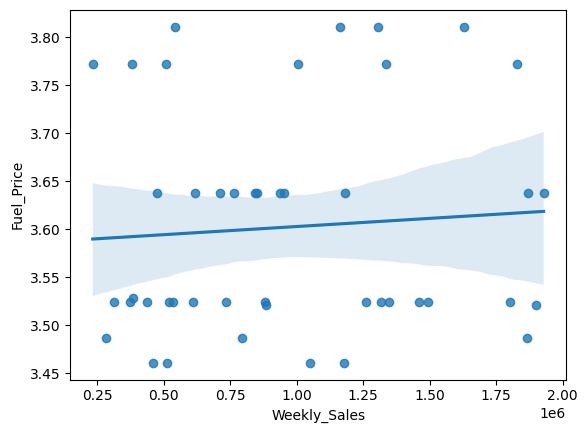

In [35]:
sns.regplot(data=Jan_2011,x='Weekly_Sales',y='Fuel_Price');

#### Slight positivecorrelation between weekly sales and Fuel price

### Weekly sales and CPI relation

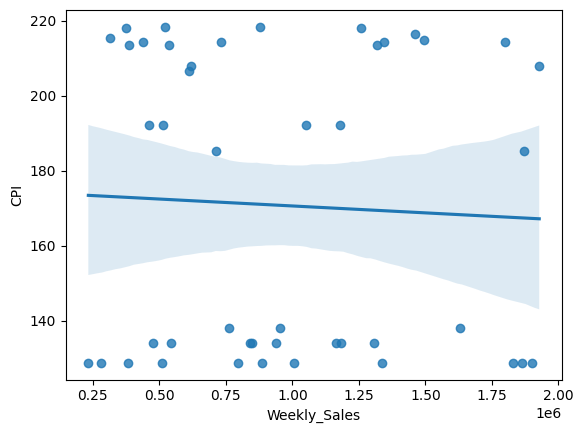

In [36]:
sns.regplot(data=Jan_2011,x='Weekly_Sales',y='CPI');

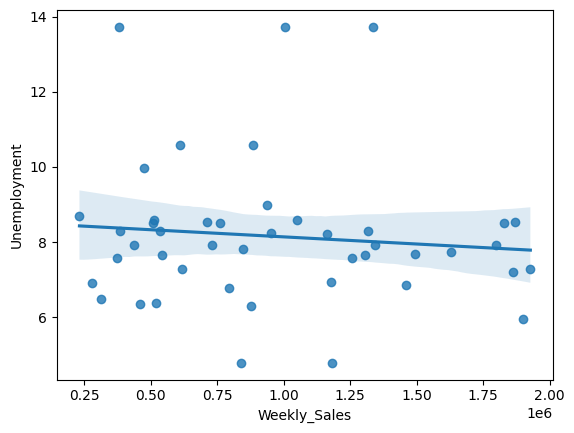

In [37]:
sns.regplot(data=Jan_2011,x='Weekly_Sales',y='Unemployment');

### Heat map

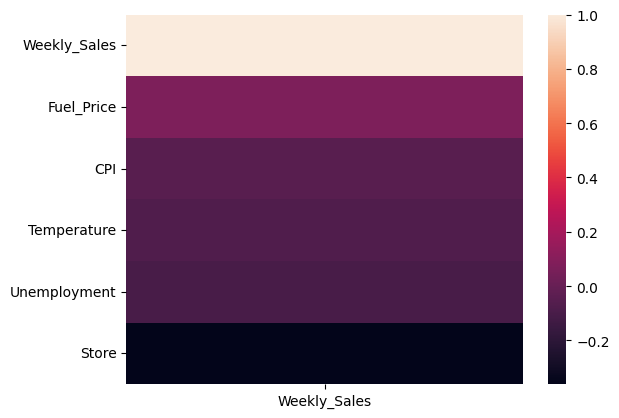

In [38]:
sns.heatmap(Jan_2011.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False))
plt.show()

##### Unemployment has no effect on weekly sales

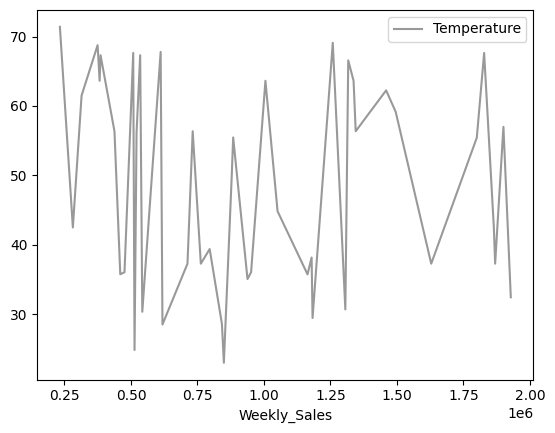

In [39]:
Jan_2011.sort_values(by='Weekly_Sales').plot.line('Weekly_Sales','Temperature',cmap='Set1_r');

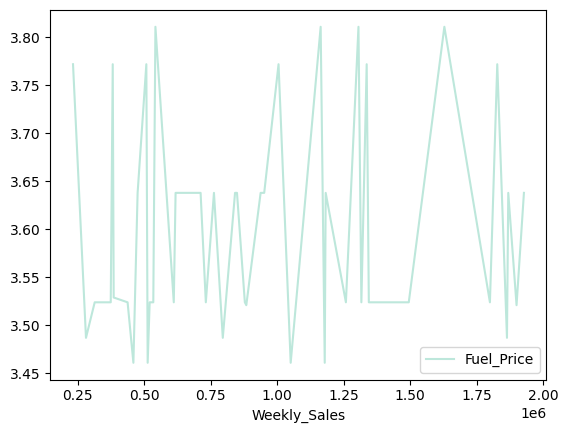

In [40]:
Jan_2011.sort_values(by='Weekly_Sales').plot.line('Weekly_Sales','Fuel_Price',cmap='icefire');

### Month base holidays

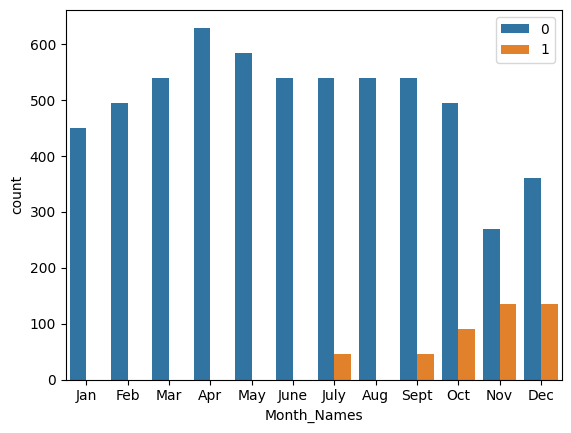

In [41]:
sns.countplot(data=data,x='Month_Names',hue='Holiday_Flag')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Only at the end of the year got a few holidays

### Year wise holiday count

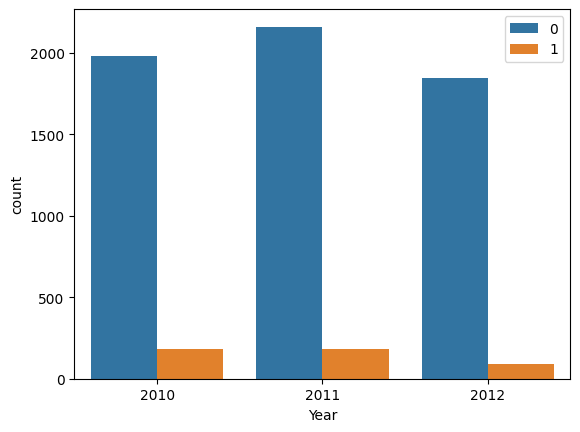

In [42]:
sns.countplot(data=data,x='Year',hue='Holiday_Flag');
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Very few holidays are in the years 2010,2011 and 2012

In [43]:
Sales_2011=data.query("Year==2011")

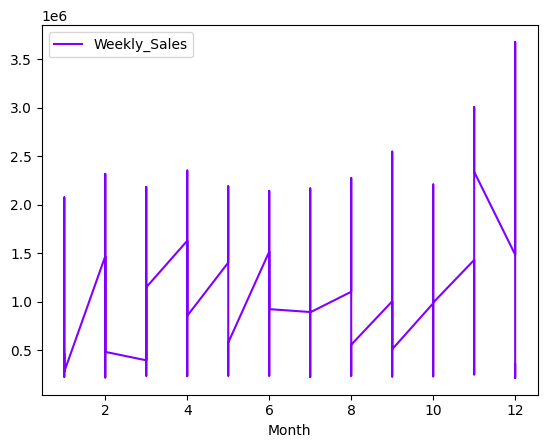

In [44]:
Sales_2011.plot.line('Month','Weekly_Sales',cmap='rainbow');

In [45]:
data_2011 = data[data.Year == 2011]
data_2011.drop(columns='Year', inplace=True)

In [46]:
data_2011

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
2160     16     459756.11             0        35.75       3.461  192.269171   
2161      3     374556.08             0        68.76       3.524  218.211418   
2162     30     437926.79             0        56.36       3.524  214.488691   
2163     19    1305950.22             0        30.68       3.811  134.068258   
2164     18     938083.17             0        35.06       3.638  134.068258   
...     ...           ...           ...          ...         ...         ...   
4495     27    1650604.60             1        37.85       3.566  140.587450   
4496     17     777207.30             1        26.73       3.119  130.071032   
4497     33     215359.21             1        51.60       3.428  130.071032   
4498     26     972834.42             1        18.80       3.402  136.643258   
4499      5     349624.88             1        45.62       3.129  220.117823   

      Unemployment  Month  Weekday Month_Names Weekday_Names  
2160         6.339      1        1         Jan           Mon  
2161         7.574      1        1         Jan           Mon  
2162         7.931      1        1         Jan           Mon  
2163         7.658      1        1         Jan           Mon  
2164         8.975      1        1         Jan           Mon  
...            ...    ...      ...         ...           ...  
4495         7.906     12        4         Dec          Thur  
4496         6.617     12        4         Dec          Thur  
4497         8.010     12        4         Dec          Thur  
4498         7.598     12        4         Dec          Thur  
4499         6.300     12        4         Dec          Thur  

[2340 rows x 11 columns]

### Weekly sales in the year 2011

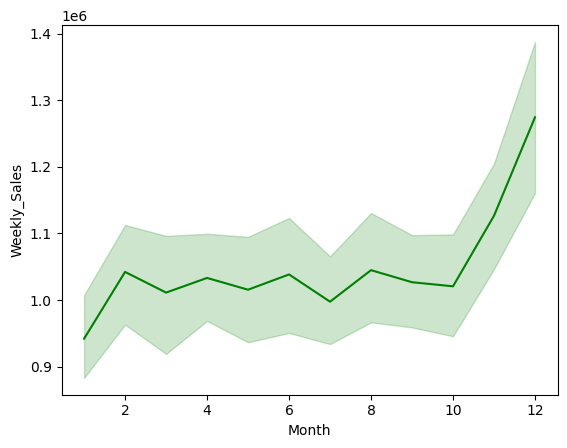

In [47]:
sns.lineplot(x='Month', y='Weekly_Sales', data=data_2011,color='g')
plt.show()

In [48]:
data_2011_jan = data_2011[data_2011.Month == 1]

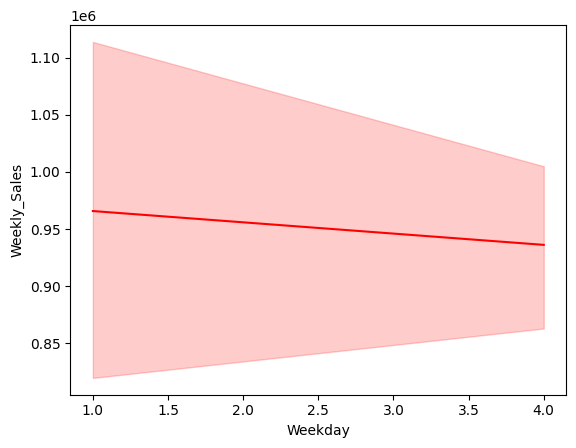

In [49]:
sns.lineplot(x='Weekday',y='Weekly_Sales',data=data_2011_jan,color='r');

In [50]:
data_2011_dec=data_2011[data_2011.Month==12]

### Dec_2011_sales

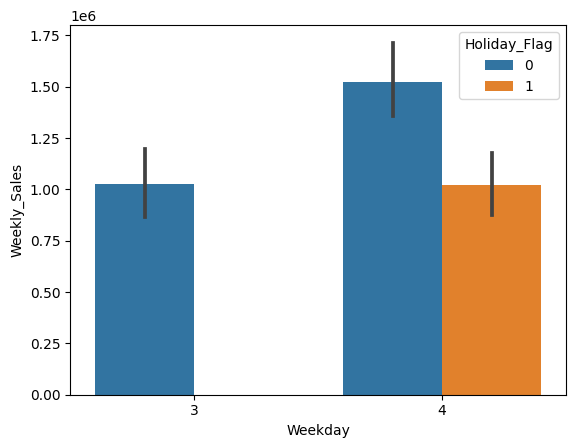

In [51]:
sns.barplot(x='Weekday',y='Weekly_Sales',data=data_2011_dec,hue='Holiday_Flag');

#### 2011,dec sales happend only on tuesdays and wednesdays

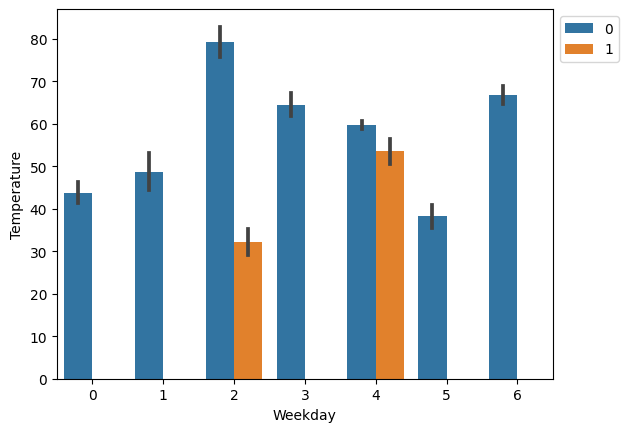

In [52]:
sns.barplot(x='Weekday',y='Temperature',data=data_2011,hue='Holiday_Flag')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

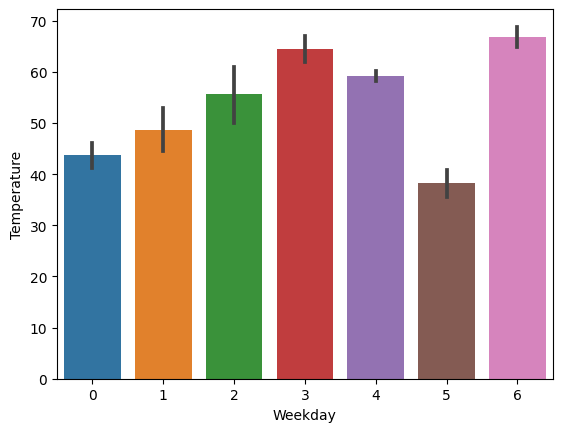

In [53]:
sns.barplot(data=data_2011,x='Weekday',y='Temperature');

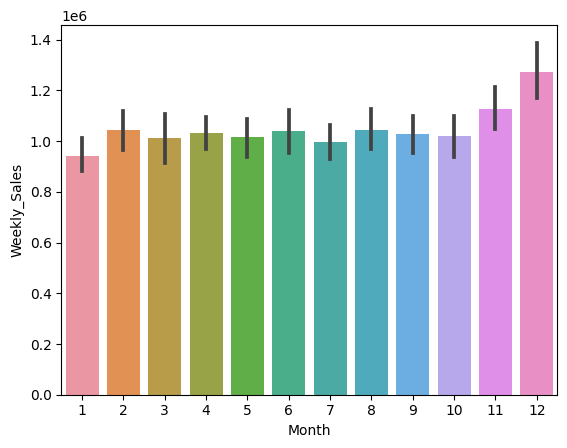

In [54]:
sns.barplot(data=data_2011,x='Month',y='Weekly_Sales');

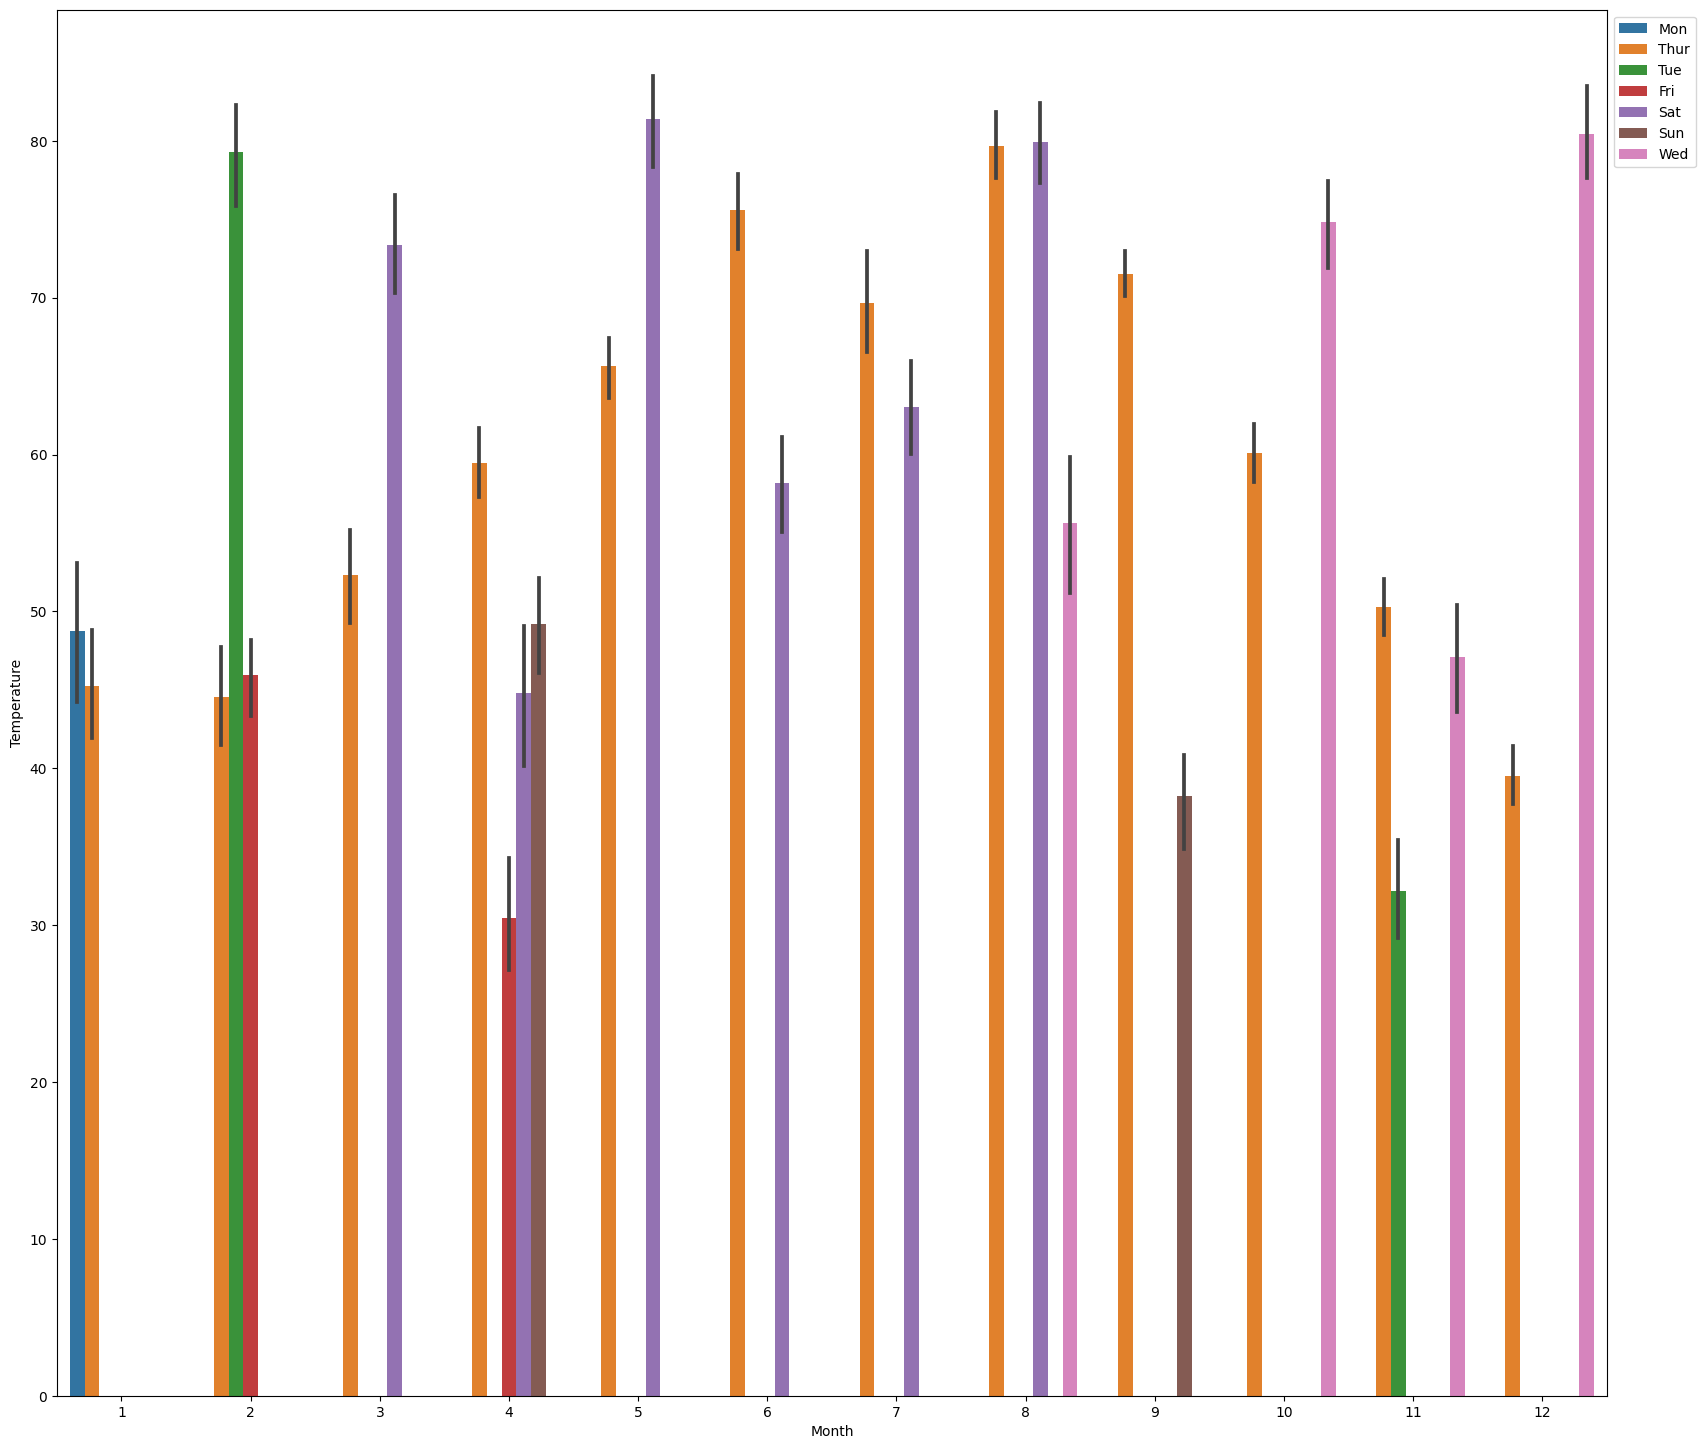

In [55]:
plt.figure(figsize=(20,18))

sns.barplot(data=data_2011,x='Month',y='Temperature',hue='Weekday_Names')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Fridays have low temp rate and wednesday,thursday and saturdays temp increases

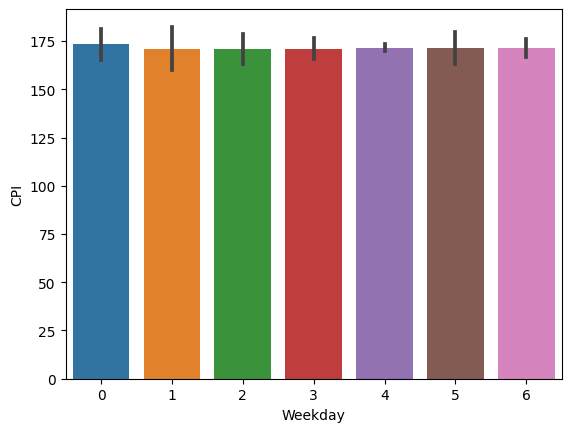

In [56]:
sns.barplot(data=data_2011,x='Weekday',y='CPI');

#### Weekday has no effect on CPI

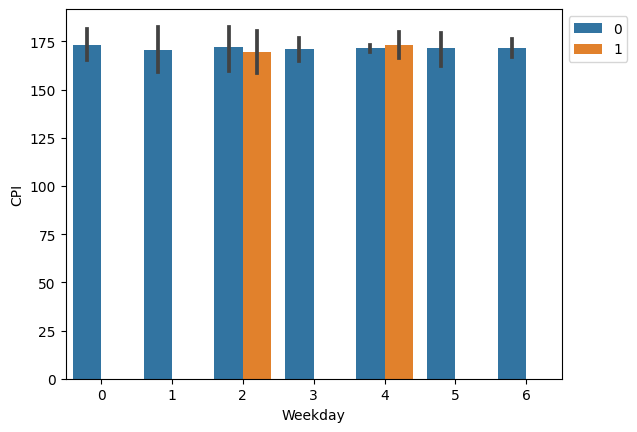

In [57]:
sns.barplot(data=data_2011,x='Weekday',y='CPI',hue='Holiday_Flag');
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Weekday and holiday has no effect on CPI

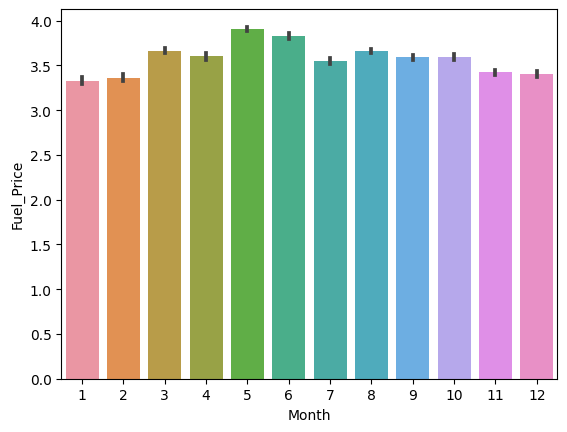

In [58]:
sns.barplot(data=data_2011,x='Month',y='Fuel_Price')
plt.show()

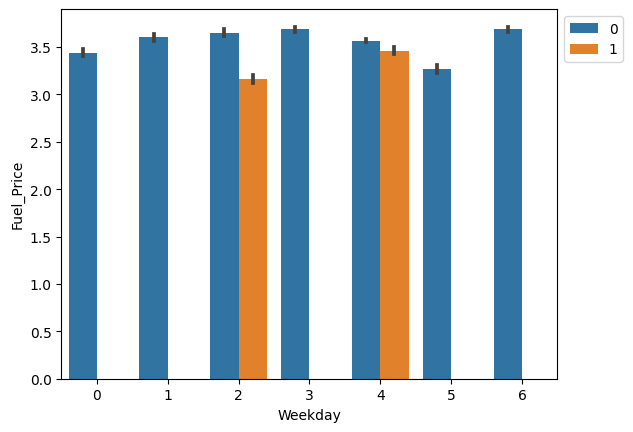

In [59]:
sns.barplot(data=data_2011,x='Weekday',y='Fuel_Price',hue='Holiday_Flag')
plt.legend(bbox_to_anchor=(1,1))
plt.show()